# Coursera Machine Learning Exercise One

Import the tools this notebook is going to use:

In [1]:
import numpy
import math
from matplotlib import pyplot as plt
%matplotlib inline

Here is a function to load the data from the CSV files into a pandas dataframe:

In [2]:
from numpy import genfromtxt
def load(f):
    '''Parse the data from the input file and store in pandas dataframs'''
    # Verify the file exist:
    try:
        _file = open(f, "r")
    except:
        print "ERROR: requested file {} does not exist or could not be opened."

    # For this exercise, both files are csv format:
    data = numpy.genfromtxt(f,delimiter=',')
    return data.T

Let's load the initial data into individual numpy arrays, and package up better later:

In [3]:
x,y = load("ex1/ex1data1.txt")

We should plot the intial data to make sure it looks right.  Here's a function that will do that:

In [4]:
def plotInitialData(x,y):
    # Now, let's plot the Profit as a function of the population:

    # Set up the plots
    fig, ax = plt.subplots(figsize=(10, 7))

    # Make a scatter plot
    ax.scatter(
        x, y, label="Individual Truck Profits")

    # Plots require a title and axis labels:
    plt.title("Food Truck Profits", fontsize=30)
    plt.xlabel("Population of City (x10,000)", fontsize=20)
    plt.ylabel("Profit of City [$] (x10,000)", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)

    # Let's set the axis ranges a little more realistically:
    ax.set_xlim([5, 25])
    ax.set_ylim([-5, 30])

    # Need a legend, of course:
    plt.legend()

    plt.grid(True)

And, let's make the plot:

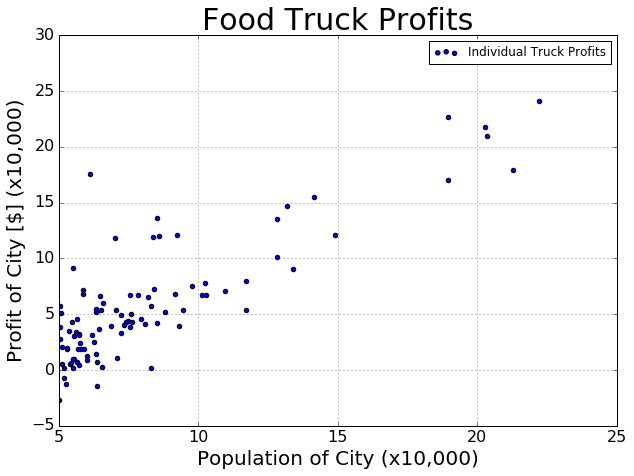

In [5]:
plotInitialData(x,y)

Let's make a function that takes in the dataframe and computes to cost function.  I'll break this into two functions, really

In [6]:
def computeCost(xvec,y,theta):
    '''Compute the cost of the data frame:
    '''
    cost_sum = numpy.sum((numpy.dot(theta,xvec) - y)**2)
    cost = 1.0/(2.*len(y))*cost_sum
    return cost

Let's set up our x vector and theta:

In [7]:
# Theta only needs two values:
theta = numpy.zeros(2)
# X vector needs to be two by 97 dimensional
xvec = numpy.zeros((2,len(x)))
# Set everything in the first column to 1
xvec[0] = 1
# and the second column is the population
xvec[1] = x

And the intial cost, with $\theta$ = (0,0) is :

In [8]:
print "Initial cost is {:.4}".format(computeCost(xvec,y,theta))

Initial cost is 32.07


To properly do linear regression, we'll need a function to update the parameters for theta.  Which means we need to use the batch gradient descent algorithm.  In this pandas dataframe set up, we can compute the needed parameters with this function:

In [9]:
def updateParams(_alpha, _theta, _xvec, _y):

    # We can update these pretty compactly:
    # This loops over the number of parameters in the vector (2, in this case)
    difference_sums = numpy.zeros(len(theta))
    for param in xrange(len(_xvec)):
        # This computes the prediction vector for the current theta as numpy.dot(theta,_xvec)
        # Then, take the difference from y and multiply that by _xvec[i] to get the update vector
        diff_vec = numpy.dot(numpy.dot(theta,_xvec) - _y,_xvec[param])
        difference_sums[param] = (_alpha / len(y))*numpy.sum(diff_vec)

    #The updated theta can now be computed pretty easily:
    _updated_theta = numpy.zeros(len(_theta))
    for param in xrange(len(_xvec)):
        _updated_theta[param] = theta[param] - difference_sums[param]

    return _updated_theta

Let's try running the gradient descent with the suggested parameters:

In [10]:
iterations=1500
alpha=0.01
cost_list = []
theta_history = []

Here is the loop to perform the gradient descent.  It takes a few seconds to run:

In [11]:
for i in xrange(iterations):
    # Update the theta parameters:
    theta = updateParams(alpha, theta, xvec,y)
    theta_history.append(theta)
    # Compute the current cost
    cost_list.append(computeCost(xvec,y,theta))


An important check for gradient descent is to verify that the cost decreased at each iteration.  Let's check that:

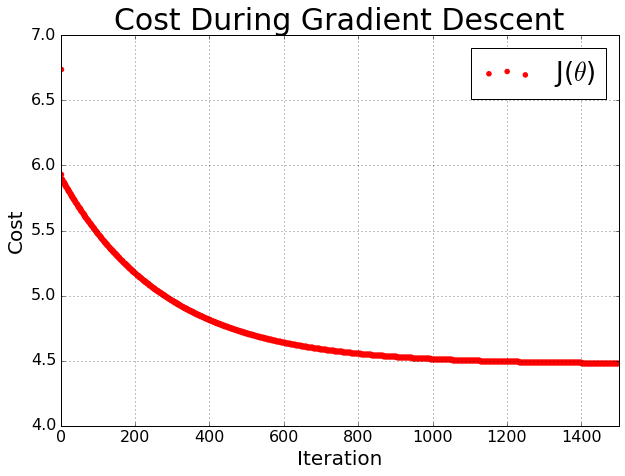

In [12]:
def plotCost(x,y):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    plt.scatter(x,y,marker="o",color='r',label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)

it = range(iterations)
plotCost(it,cost_list)

We should plot the fitted line to verify it agrees with the data

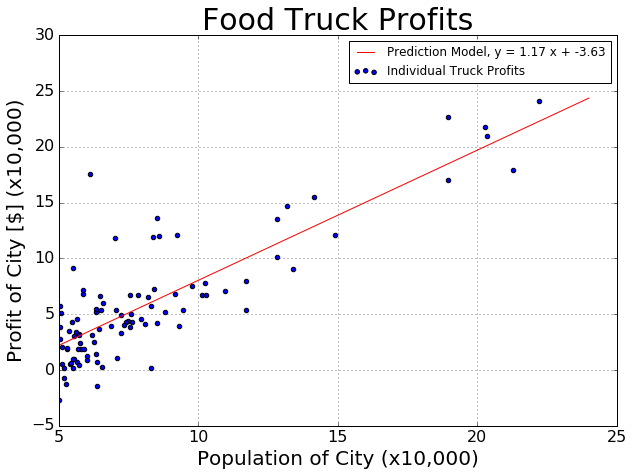

In [13]:
#Define a function to predict the profit based on the population:
def predict(population,theta):
    return theta[0] + population*theta[1]

plotInitialData(x,y)
populations = numpy.arange(5,25,1)
#Use numpy here to apply the prediction function to the array of populations:
profits = numpy.apply_along_axis(predict,axis=0,arr=populations,theta=theta)
plt.plot(populations,profits,
         label="Prediction Model, y = {:.3} x + {:.3}".format(theta[1],theta[0]),
         color='r')
plt.legend()

Lastly, we can make predictions for the profit based on the population of the cities:

In [14]:
print "Prediction for a city with a city with 35,000 people: ${} ".format(math.trunc(1000*predict(3.5,theta)))
print "Prediction for a city with a city with 70,000 people: ${} ".format(math.trunc(1000*predict(7,theta)))

Prediction for a city with a city with 35,000 people: $451 
Prediction for a city with a city with 70,000 people: $4534 


# Visualizing the cost function

We want to visualize the cost function and the path it took to reach the minimum.  To do this, we'll need the cost function sampled at a large array of values for theta0 and theta1.

In [71]:
# Create a list of theta values to sample over
theta0_vals = numpy.arange(-20,20,0.5)
theta1_vals = numpy.arange(-5,10,0.1)
j_vals = numpy.zeros((len(theta1_vals),len(theta0_vals)))

Fill in the values of j_vals

In [72]:
for i in xrange(len(theta0_vals)):
    for j in xrange(len(theta1_vals)):
        temp_theta = [theta0_vals[i],theta1_vals[j]]
        j_vals[j][i] = computeCost(xvec,y,temp_theta)

Now let's plot.  Start with a contour plot of J($\theta$)

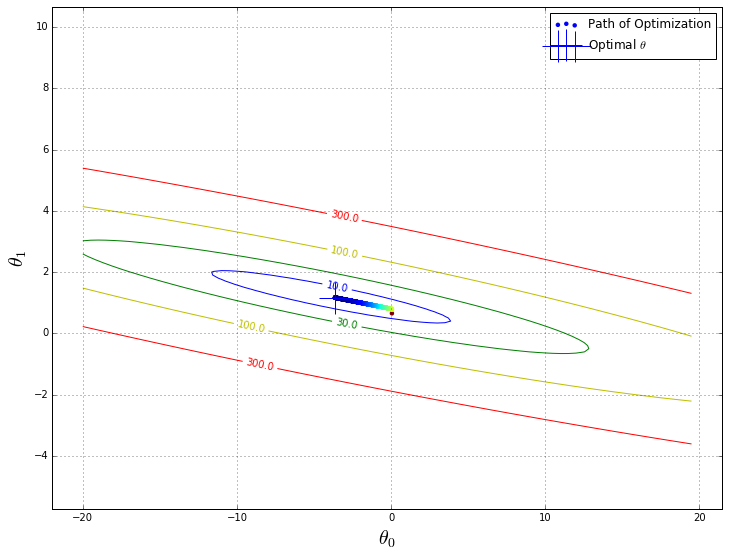

In [73]:
def contourCostPlot():

    # Make the plot and axis:
    fig, ax = plt.subplots(figsize=(12,9))
    
    # Going to want to show the path of optimization, so determine the x and y coordinates of that path
    opt_path_x = numpy.asarray(theta_history).T[0]
    opt_path_y = numpy.asarray(theta_history).T[1]
    
    
    
    # Make the contour plot of the cost function:
    contours = plt.contour(theta0_vals,theta1_vals,j_vals,
                           levels=[10, 30, 100, 300],
                           colors=['b','g','y','r'],
                           label="Cost Function")
    plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
    
    

    
    # Add the path of descent:
    plt.scatter(x=opt_path_x, y=opt_path_y,c=cost_list, lw=0, label="Path of Optimization")
    
    # Add the optimal point
    plt.scatter(theta[0],theta[1],s=[1000],marker='+',label=r"Optimal $\theta$")
    
    plt.xlabel(r"$\theta_0$",fontsize=20)
    plt.ylabel(r"$\theta_1$",fontsize=20)
    
    #print opt_path_x
    plt.legend()
    plt.grid(True)
    

contourCostPlot()

As you can see from above, this is a great candidate to apply feature scaling. 

Also make a surface plot:

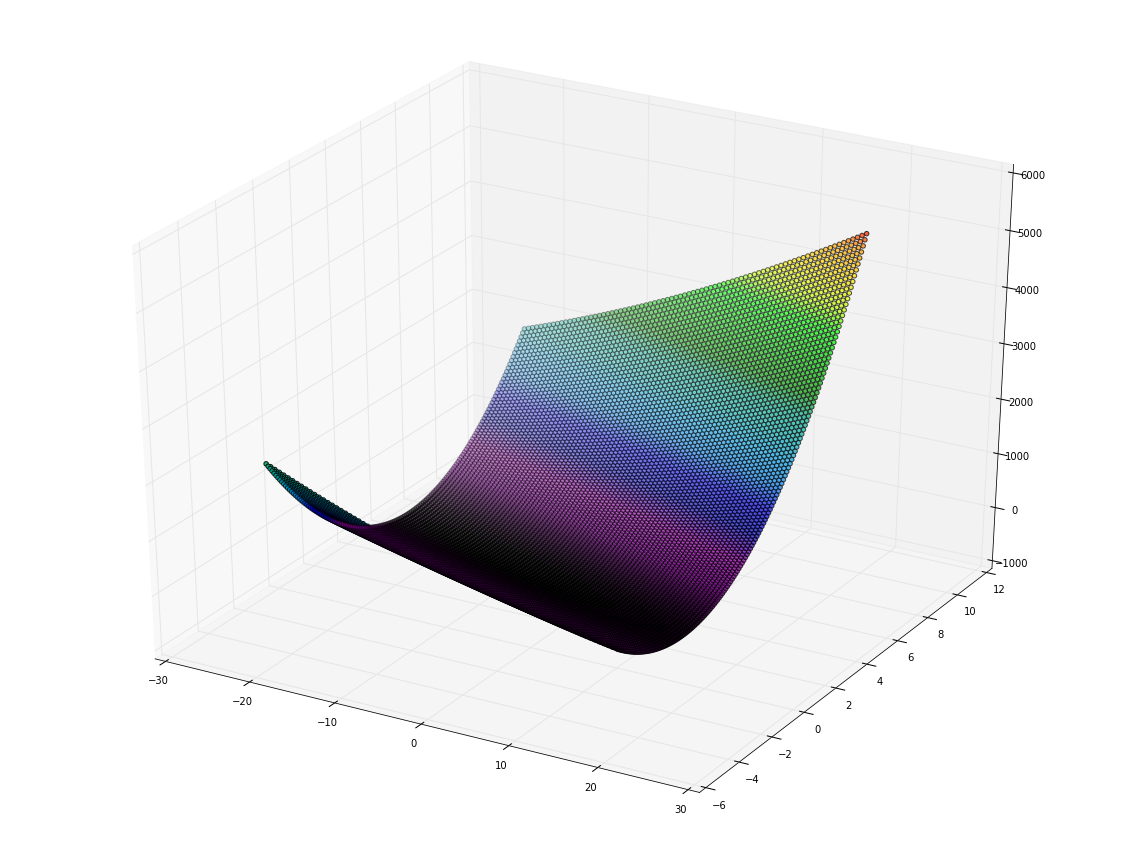

In [85]:
#These are some required 3D dependencies:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

def plotCost3D():


    fig = plt.figure(figsize=(20,15))
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(theta0_vals, theta1_vals)
    

    surf = ax.scatter(X,Y,j_vals,c=j_vals,
                      cmap=plt.get_cmap('spectral'),
                      vmin=0,vmax=6000)


    plt.show()

plotCost3D()